# Setup

In [ ]:
#레이블이 있기떄문에 특정상황에 대한 count값이 있기 때문에 지도 학습에 해당이된다
#분류와 회귀중 회귀와 관련 된 문제!
#자전거 대여량을 예측하는 문제이기때문에 회귀에 대한 문제이다.

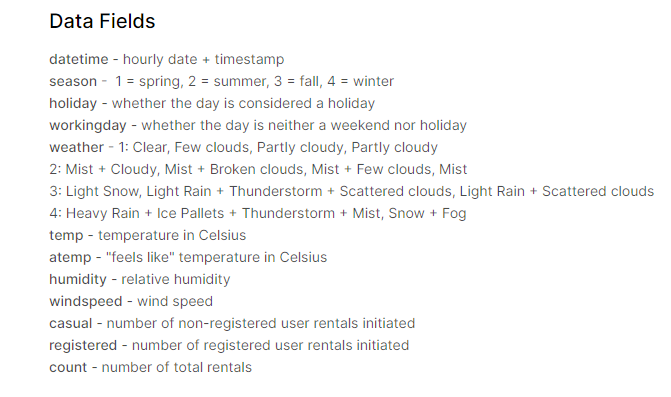

Load Dataest

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

#노트북 안에 그래프를 그려주기 위해서 
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

##구글 코랩에서 자료 땡길떄
from google.colab import drive
drive.mount('/content/drive')
traindata = '/content/drive/MyDrive/ITStudy/deep_Learning/프로젝트파일/워싱턴dc/train.csv'

Mounted at /content/drive


In [ ]:
train = pd.read_csv(traindata, parse_dates = ["datetime"]) # parse_dates를 해서 데이트타임 형식으로 불러온다.
train.shape

(10886, 12)

# 기본적인 Data 사전조사

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.head()#상위 5개 데이터 count 데이터를 통해 시각화를 해볼거다. windspeed가 0인 데이터만 보여서 더 봐야할것 같다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.head(15) #15개 데이터를 더 보니 0이 아닌 다른 데이터도 보인다. 채워지지않은 데이터를 0으로 표현한듯?

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
train.describe() #전체 describe를 한다.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
train.isnull().sum() # train데이터에서 0인 데이터가 있는지 찾아봤다.>>결과는 없구만

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

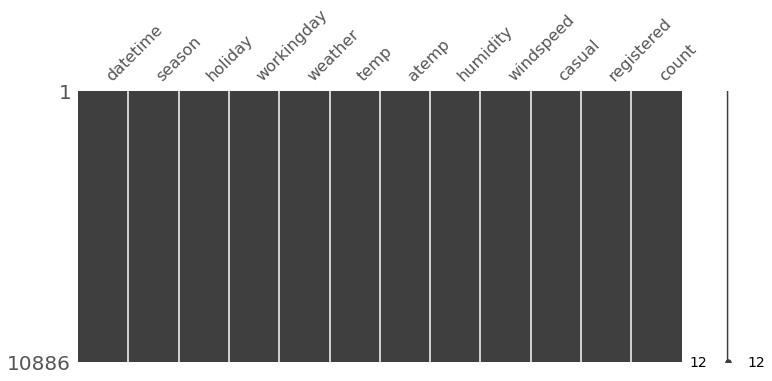

In [ ]:
import missingno as msno #시각화로 null인 값을 찾아주는 툴이다.
msno.matrix(train, figsize = (12,5)) # >> 그림을 보아하니 없어보임

# 시각화

Feature Engineering 

In [ ]:
#train 데이터안에 datetime으로 이루어져있는 데이터를 좀더 나눠서 보기위해( = 시각화 해서 보기 쉽게하기 위해)
# 즉 세분화 과정
# 다시 담는 과정 >> column이 12개 에서 18개로 늘어 났음
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [ ]:
train.head() # count 뒤로 내가 추가해준 항목들이 생긴것을 확인할수있다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'Hour count')]

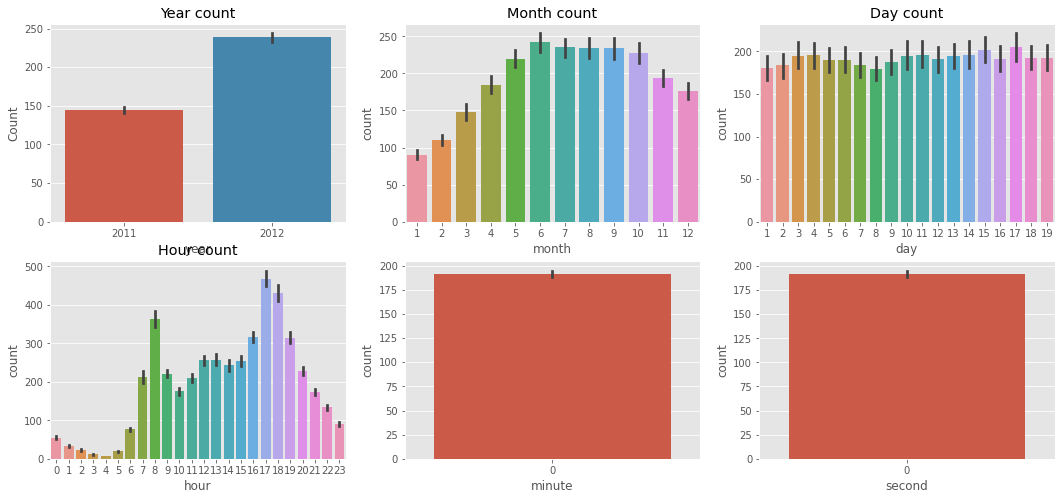

In [ ]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="Year count")
ax2.set(xlabel='month',title="Month count")
ax3.set(xlabel='day', title="Day count")
ax4.set(xlabel='hour', title="Hour count")

In [ ]:
# 연도별로 봤을떄는 2012년이 더 많이 늘어난것을 확인가능하다
# 월별을 볼떄 추울떄보다는 따뜻할때 더 많이 빌렸다.
# 19일까지 있는것을 보아하니 이것을 feature로 활용할 수 는 없을 것 같다. 전부 있지 않기 때문, 참고만 하면될것 같다.
# 시간별 대여량을 봤을때 출퇴근 시간에 많이 대여하는 것을 알수있다. 하지만 주말은 어떨까?
# 분,초 도 다 0이기 떄문에 의미없는 데이터이기에 쓸 수 없다.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working Day count')]

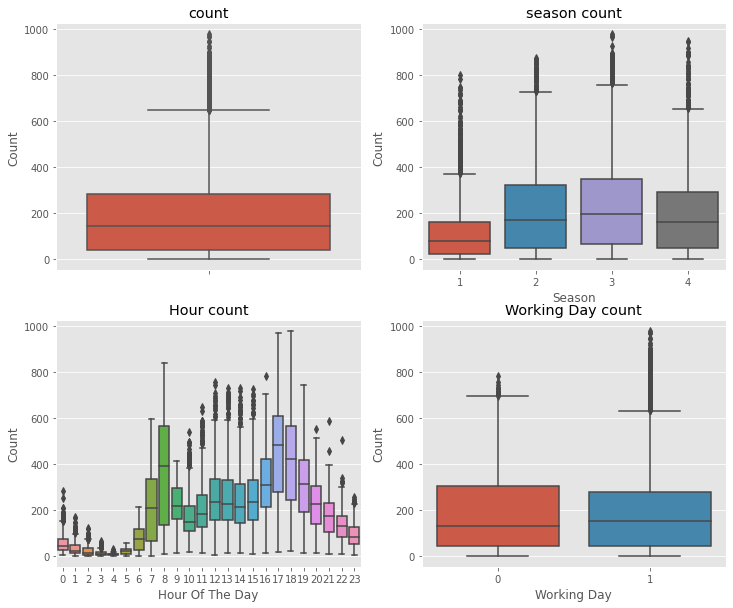

In [ ]:
#박스 플롯으로 서브플롯을 그려 볼 것 이다.
# 계절, 시간 워킹데이 기준으로 봐보겠다.
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="season count")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Hour count")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Working Day count")

In [ ]:
# 대여량을 봤을때 특정구간에 몰려있는것을 확인
# 봄여름가을겨울을 봤을때 여름과 가을이 가장많고 그다음 겨울
#시간은 위의 그래프와 비슷
# 근무일여부에 따라서는 큰 차이 없어 보임 하지만 근무일일떄보다는 아닐때 휴일일때 더 많은 것 같다.

In [ ]:
#데이터프레임에 dayofweek를 안 담았기때문에~ train 데이터프레임안에 dayofweek도 담아준다.
# 결과값이 19개로 column이 하나 늘은것을 확인가능
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [ ]:
train["dayofweek"].value_counts() #월화수목금토일 의 내용이다.

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

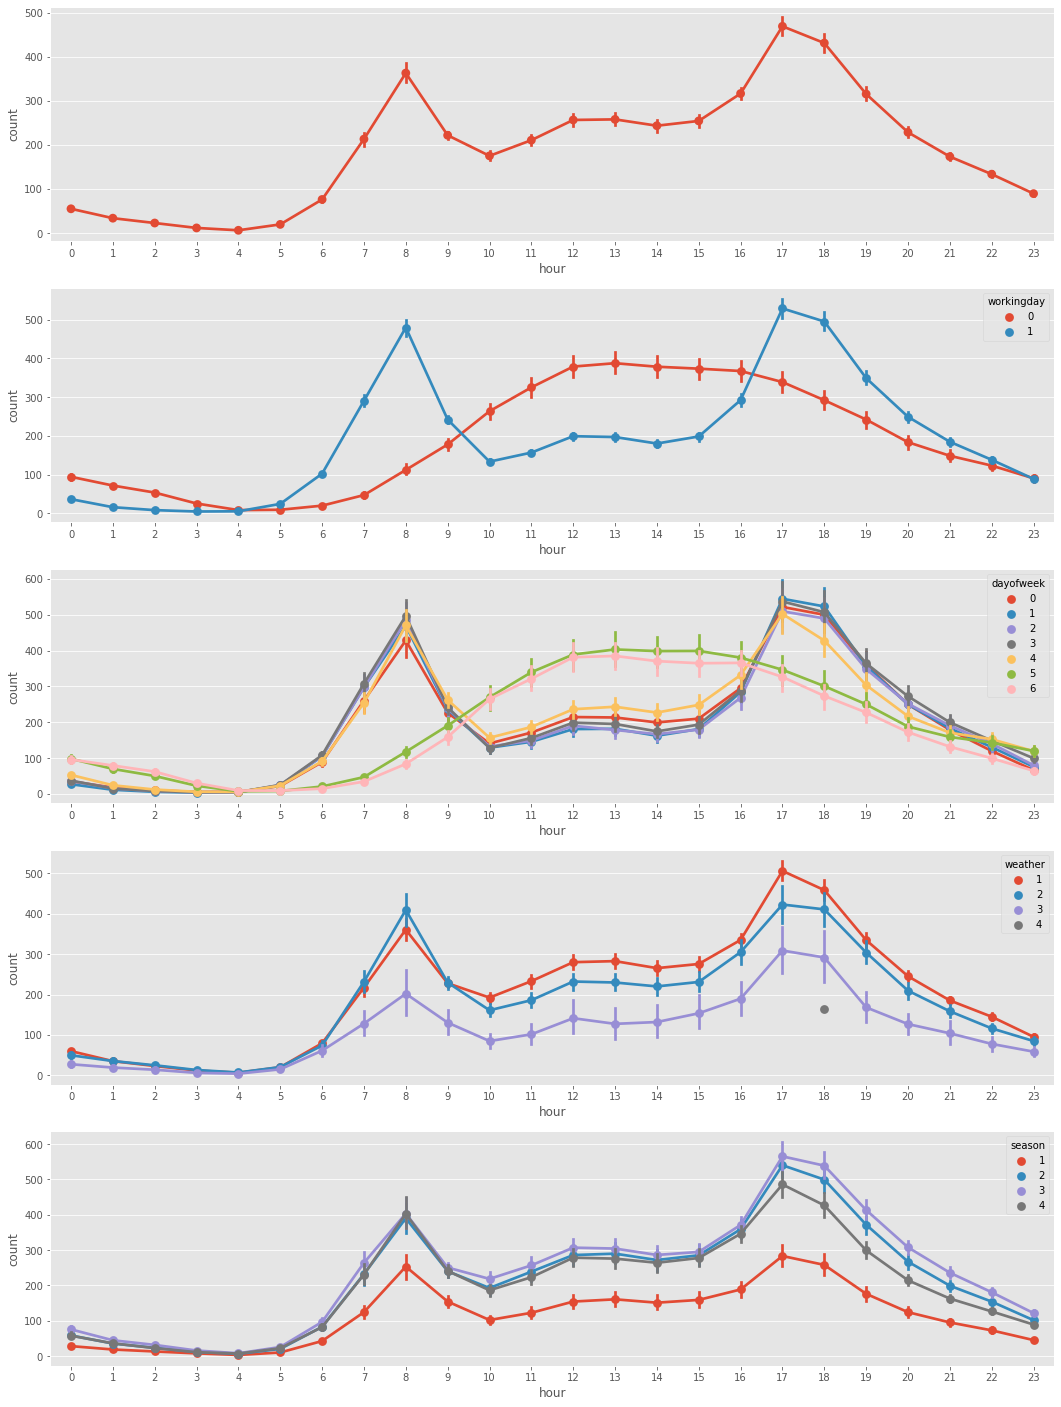

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows = 5) #로우를 5개를 줘서 5개의 로우를 가진 그래프를 볼거임
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

In [ ]:
#워킹데이로 봤을때는 출퇴근 시간대에 꼭 많이 빌리는건 아님 
#데이오브위크를 봤을떄도 워킹데이랑 비슷한 상태임을 확인
#날씨로 봤을떄도 날씨가 좋을떄 많이 빌리고 그런거 보이고
# 123이 가장많이 안빌리고 가을789 여름456 겨울101112 순으로 빌린다.
#시간대로 봤을때는 출퇴근시간대에 많은것을 확인가능

In [ ]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


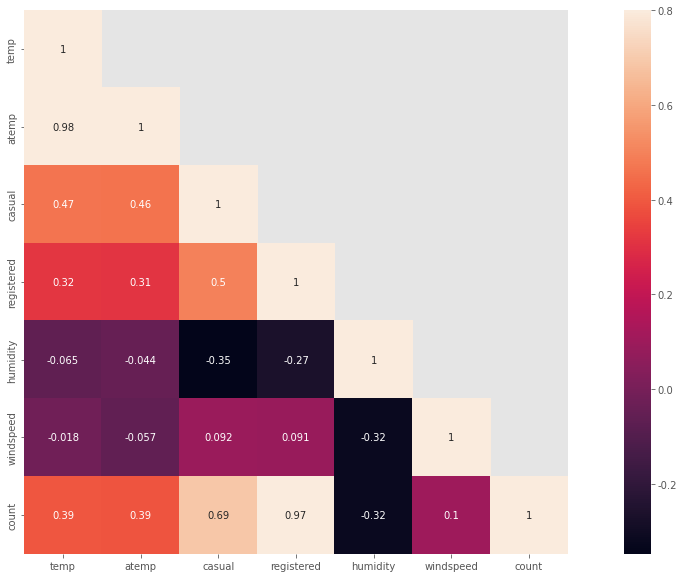

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)# 연관관계를 히트맵으로 확인해본다.

In [ ]:
# 온도습도풍속은 연관관계가 별로없다.
# count와 가장 연관관계가 높은건 registered 다
# registered  는 등록된 사용자, casual은 등록되지않은 사용자인데 casual은 풍속과 관계가 높다.
# registered와 casual은 train데이터에만 있다. test데이터에서는 사용하기 어렵다.
# atemp와 temp는 체감온도와 온도인데 0.98로 상관계수가 높은데 온도와 체감온도로 피쳐로 사용하기에 적합하지않을수있다. 너무 높기 떄문에 같은 데이터로 보여진다.


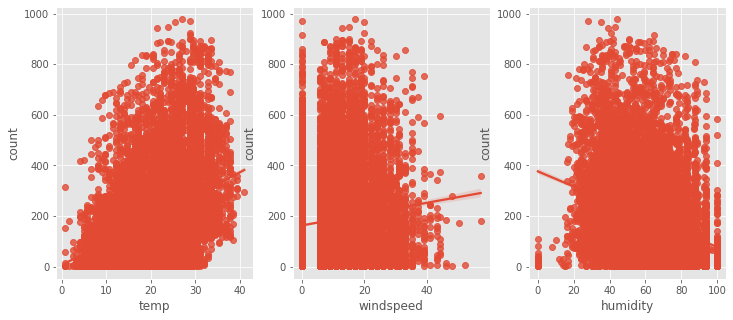

In [ ]:
#regplot으로 온도 풍속 습도 상관관계를 보기위해 그림
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3)

In [ ]:
#풍속은 0에 바람이 몰려있다.
#습도도 0과 100에 데이터가 몰려있는것을 확인할수있다.

In [ ]:
#월별데이터를 모아보려고한다. 연도와 월을 붙여서 2011년과 2012년에 높아진 데이터를 한번 붙여서 봐보겠다.

In [ ]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


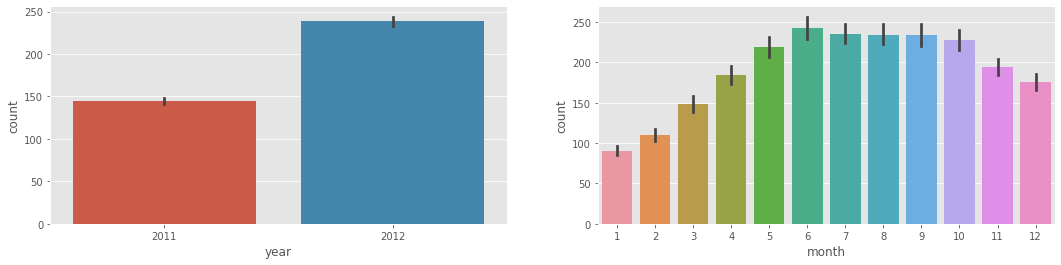

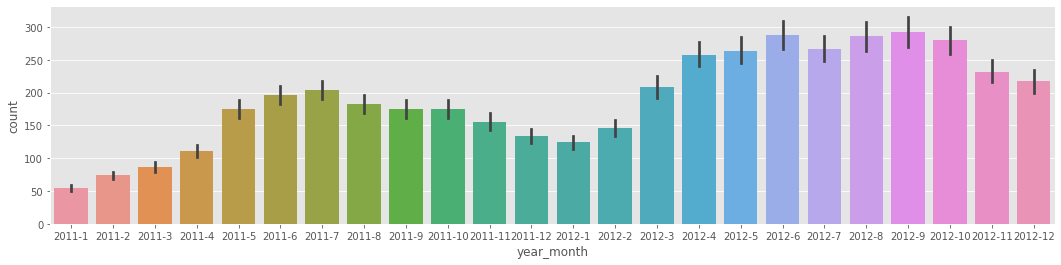

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)

In [ ]:
# 2011년보다 2012년 대여량이 더 많아지는 추세(증가)
# 겨울보다는 여름에 대여량이 많은것을 확인가능

In [ ]:
#아까 0과 100 에 너무 몰려있던 데이터를 제거해주는 작업을 진행해보려고 한다. 즉, 몰린 데이터 제거
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


In [ ]:
# 10886에서 10739로 줄어든 것 을 확인가능하다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909617))

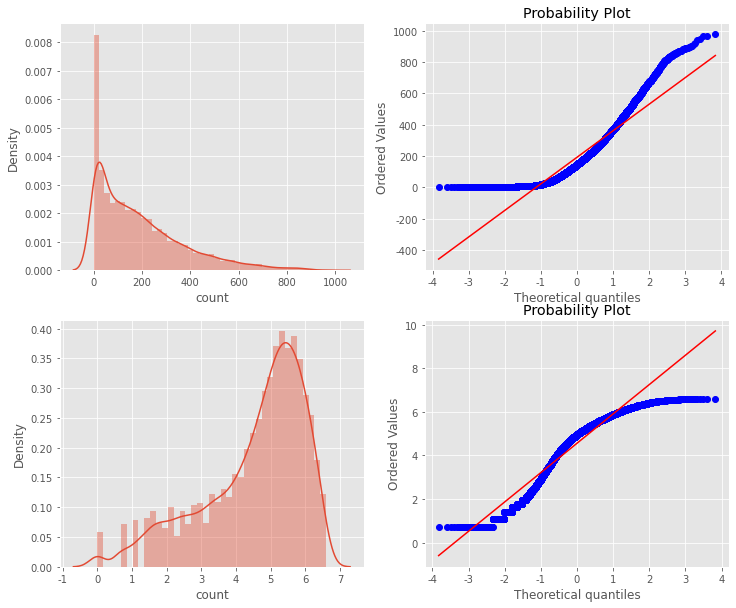

In [ ]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

count변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.

참고 : EDA & Ensemble Model (Top 10 Percentile) | Kaggle

# 앙상블

In [ ]:
#특정기후 상황에서의 얼마나 자전거대여량이 있을지 자전거 대여수량을 예측하는거라 regression
#sgd regressor, lasso , ridgeregression 등이있는데 일단 랜덤 포레스트로 풀어보고 그 다음에 다른 모델로 풀ㅇ어보겠다
#지도 학습과 비지도학습을 나누는 제일 큰 기준은 레이블된 데이터가 있냐 없냐의 차이
# 분류기를 가져오고 > 학습 시키고 > 예측을하고> 점수를 내고
#clf = RandoomForestClassifier() > clf.fit(X_train, y_train) > y_pred = clf.predict(X_test) > clf.score(X_test, y_test)
# decision Treee  시간이 매우 빠르다는게 장점이다, 시각화하기 좋다.
# decision tree 들을 모아서 random forest 를 실행
#feature를 만들어서 예측하다보면 과대적합(너무 복잡해서 일반화하기 어려운)과 과소적합(너무간단한)을 피해줘야한다.
#feature를 너무 복잡한 모델은 쓰는건 좋은게 아니다.

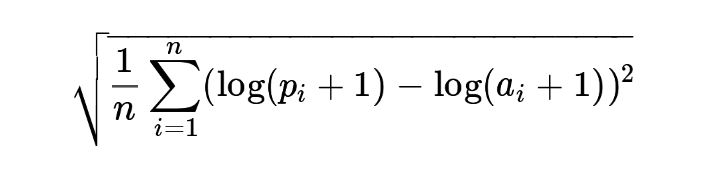

In [ ]:
#일단 캐글에서 평가로 RMSLE를 알려줌 >> RMSLE는 과대평가된 항목보다는 과소평가 된 항목에 패널티를 준다.
# 오차를 제곱해서 평균한 값의 제곱근 으로 작을 수록 정밀도가 높다. 0에 가까운 값이 나올 수록 정밀도가 높은값
#캐글에 RMSLE 공식을 구현한 사람 있음 (EDA & Ensemble Model (Top 10 Percentile) 의 코드를 참조)
# def rmsle(y, y_,convertExp=True):
#     if convertExp:
#         y = np.exp(y),
#         y_ = np.exp(y_)
#     log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
#     log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
#     calc = (log1 - log2) ** 2
#     return np.sqrt(np.mean(calc))

앙상블

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
traindata = '/content/drive/MyDrive/ITStudy/deep_Learning/프로젝트파일/워싱턴dc/train.csv'
testdata = '/content/drive/MyDrive/ITStudy/deep_Learning/프로젝트파일/워싱턴dc/test.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv(traindata, parse_dates=["datetime"])
train.shape

(10886, 12)

In [ ]:
test = pd.read_csv(testdata, parse_dates=["datetime"])
test.shape

(6493, 9)

In [ ]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 16)

In [ ]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 13)

In [ ]:
from pandas.core.arrays import categorical
#연속형 feature와 범주형 feature를 구분해야함
#범주형 feature의 타입을 카테고리를 바꿔줘야함
#범주형 feature 는 원핫인코딩으로 바꿔주면 점수가 높아지는데 도움은 되는데 qnA를 보니까 원핫인코딩을 해봐도 도움 별로 안된다고해서 원핫인코딩은 하지않았다.
#일단 특정한 feature을 선택해서 진행
#범주형 데이터를 'category' 타입으로 변환 시켜주는 이유는 위 질문과도 비슷한 이유일텐데 계절이 1, 2, 3, 4로 되어있습니다.
#이걸 그냥 넣어주게 되면 2는 1보다 2배크고 4는 4배크고 숫자형 데이터로 머신러닝 알고리즘이 이해하게 되기 떄문
categorical_feature_names = ['season','holiday','workingday','weather','year','month','hour','dayofweek']
for var in categorical_feature_names:
  train[var] = train[var].astype('category')
  test[var] = test[var].astype('category')

In [ ]:
feature_names = ['season','holiday','workingday','weather','year','month','hour','dayofweek','humidity','atemp','temp']

In [ ]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,year,month,hour,dayofweek,humidity,atemp,temp
0,1,0,0,1,2011,1,0,5,81,14.395,9.84
1,1,0,0,1,2011,1,1,5,80,13.635,9.02
2,1,0,0,1,2011,1,2,5,80,13.635,9.02
3,1,0,0,1,2011,1,3,5,75,14.395,9.84
4,1,0,0,1,2011,1,4,5,75,14.395,9.84


In [ ]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,year,month,hour,dayofweek,humidity,atemp,temp
0,1,0,1,1,2011,1,0,3,56,11.365,10.66
1,1,0,1,1,2011,1,1,3,56,13.635,10.66
2,1,0,1,1,2011,1,2,3,56,13.635,10.66
3,1,0,1,1,2011,1,3,3,56,12.880,10.66
4,1,0,1,1,2011,1,4,3,56,12.880,10.66


In [ ]:
label_name = 'count' #라벨 데이터 가져와서 y데이터에 담아줌

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
# 이걸 쓸 경우 2개만 필요 false를 지운다.
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score
rmsle_scorer = make_scorer(rmsle) #모델 검증 make_scorer 검증하는 단계
rmsle_scorer

make_scorer(rmsle)

In [ ]:
#3가지 선형회귀 모델을 가지고 예측할것
from sklearn.linear_model import LinearRegression, Ridge, Lasso

rmsle_scorer = make_scorer(rmsle) #모델 검증

##선형 과정
LinModel = LinearRegression() # 선형회귀 모델 초기화
#모델 학습
y_train_log = np.log1p(y_train) #1을 더한 값에 로그를 씌워서 학습을 시켜본다.
LinModel.fit(X_train, y_train_log) #학습(fit)

#예측과정 진행하고 정확도를 평가한다.
LinPre = LinModel.predict(X_train)
print('RMSLE : VALUE  :LinearRegression : ', rmsle(np.exp(y_train_log),np.exp(LinPre)))

RMSLE : VALUE  :LinearRegression :  0.9785390506006785


In [ ]:
##릿지 과정
from sklearn.model_selection import GridSearchCV #그리드 탐색
from sklearn import metrics


RidModel = Ridge() # 릿지 모델
#그리드탐색으로 classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적 입력하면서 최적의 파라미터를 도출하게 해준다.
Rid_params = {'max_iter' : [3000], 'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}#max_iter = 반복실행하는 최대횟수

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False) #검증

grid_RidModel = GridSearchCV( RidModel, Rid_params, cv = 5 , scoring = rmsle_scorer )

#모델학습
y_train_log = np.log1p(y_train) #1을 더한 값에 로그를 씌워서 학습을 시켜본다.
grid_RidModel.fit( X_train, y_train_log ) #학습(fit)

#예측과정 진행하고 정확도를 평가
RidPre = grid_RidModel.predict(X_train)
print(grid_RidModel.best_params_) #최적의 알파값을 찾는 것
print('RMSLE : VALUE : Ridge Regreession : ', rmsle(np.exp(y_train_log),np.exp(RidPre)))

df = pd.DataFrame(grid_RidModel.cv_results_)
df.head()

{'alpha': 0.01, 'max_iter': 3000}
RMSLE : VALUE : Ridge Regreession :  0.9785390490553865


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027308,0.015251,0.010874,0.004997,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-0.267662,-0.208334,-0.253675,-0.221896,-0.207974,-0.231908,0.024417,1
1,0.016774,0.002434,0.009242,0.002699,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-0.267663,-0.208334,-0.253675,-0.221895,-0.207974,-0.231908,0.024417,2
2,0.018938,0.008364,0.007640,0.003447,1,3000,"{'alpha': 1, 'max_iter': 3000}",-0.267673,-0.208338,-0.253674,-0.221891,-0.207969,-0.231909,0.024421,3
3,0.031885,0.007600,0.013516,0.004074,2,3000,"{'alpha': 2, 'max_iter': 3000}",-0.267683,-0.208343,-0.253674,-0.221885,-0.207964,-0.231910,0.024424,4
4,0.020280,0.006993,0.006685,0.002923,3,3000,"{'alpha': 3, 'max_iter': 3000}",-0.267694,-0.208348,-0.253674,-0.221880,-0.207958,-0.231911,0.024428,5


In [ ]:
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
df[["alpha", "rmsle"]].head()

,alpha,rmsle
0,0.01,0.231908
1,0.10,0.231908
2,1.00,0.231909
3,2.00,0.231910
4,3.00,0.231911


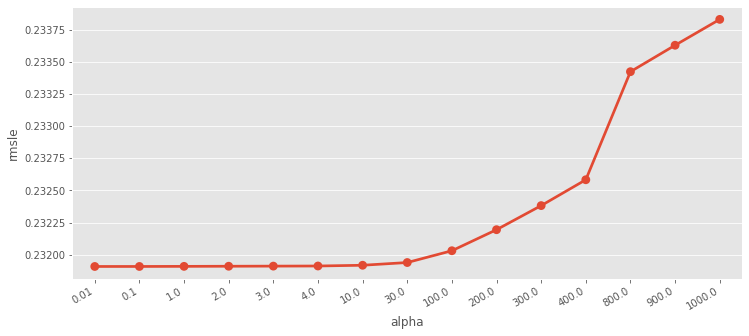

In [ ]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [ ]:
##라쏘 과정
#라쏘는 선형회귀의 규제를 적용하는 대안 >> 계수를 0에 가깝게 만들려는것 이것을 L1규제
#어떤 계수는 0이 되기도 하는데 이는 완전히 제외하는 feature가 생긴다는 의미다.
#feature 선택이 자동이며 alpha값의 기본값은 1.0, 과소적합줄이려면 값을 줄여야함
# 그리드 서치로 아래 라쏘모델 실행했을때 베스트 알파값은 0.0025
LassoModel = Lasso() #라쏘 모델

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params = { 'max_iter':[3000],'alpha':alpha}

grid_LassoModel = GridSearchCV(LassoModel, lasso_params, cv= 5 , scoring = rmsle_scorer)

#모델학습
y_train_log = np.log1p(y_train)
grid_LassoModel.fit(X_train, y_train_log)
LassoPre = grid_LassoModel.predict(X_train)

print(grid_LassoModel.best_params_)
print('RMSLE : VALUE : LASSO : ', rmsle(np.exp(y_train_log),np.exp(LassoPre)))

df = pd.DataFrame(grid_LassoModel.cv_results_)

df.head()

df["alpha"] = df['params'].apply(lambda x:x['alpha'])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)

df[["alpha","rmsle"]].head()

{'alpha': 0.0033333333333333335, 'max_iter': 3000}
RMSLE : VALUE : LASSO :  0.978660914084973


,alpha,rmsle
0,10.000000,0.317347
1,1.000000,0.251975
2,0.500000,0.248059
3,0.333333,0.247313
4,0.250000,0.246368


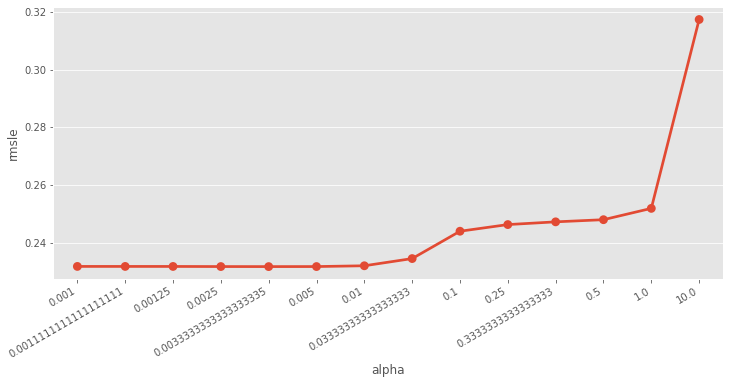

In [ ]:
#그리드서치한값 시각화
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [ ]:
#랜덤포레스트 앙상블
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds))
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.10281457121722255


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


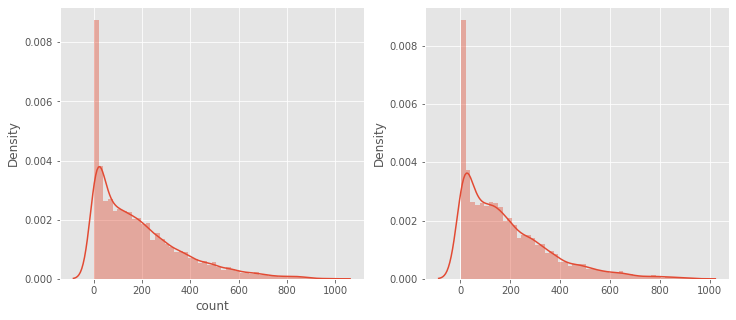

In [ ]:
predsTest = rfModel.predict(X_test)
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [ ]:
#submit
submission = pd.read_csv("/content/drive/MyDrive/ITStudy/deep_Learning/프로젝트파일/워싱턴dc/sampleSubmission.csv")
submission

submission["count"] = np.exp(predsTest)

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.143785
1,2011-01-20 01:00:00,5.458410
2,2011-01-20 02:00:00,3.895519
3,2011-01-20 03:00:00,4.348996
4,2011-01-20 04:00:00,3.733879


In [ ]:
submission.to_csv(f"/content/drive/MyDrive/ITStudy/deep_Learning/프로젝트파일/워싱턴dc/Score_{score:.5f}_submission.csv".format(score), index=False)